In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

FILES_DIR = os.path.abspath('tmp')

In [2]:
def showHistogram(imageName, imageDir = 'normal', type = 'Normal'):
    image = Image.open(f'{FILES_DIR}/{imageDir}/{imageName}')
    histogram = image.histogram()

    plt.figure()
    plt.title(f'Histograma da {imageName} [{type}]')
    plt.xlabel("Nível de Cinza")
    plt.ylabel("Número de Pixels")
    plt.plot(histogram, color = 'black')
    plt.xlim([0, 255])

    imageName = imageName.split('.')
    imageName = imageName[0] + '_histogram.png'

    plt.savefig(f'{FILES_DIR}/histograms/{imageName}')
    plt.show()

def uniformNoise(imageName, intensity = 10):
    image = np.asarray(Image.open(f'{FILES_DIR}/normal/{imageName}'))

    noise = np.random.uniform(-intensity, intensity, image.shape)

    noiseImage = np.clip(image + noise, 0, 255).astype(np.uint8)
    noiseImage = Image.fromarray(noiseImage)

    imageName = imageName.split('.')
    imageName = imageName[0] + '_uniformNoise.' + imageName[1]

    noiseImage.save(f'{FILES_DIR}/noise/{imageName}')
    showHistogram(imageName, 'noise', 'Uniforme')

def saltPepperNoise(imageName, saltProb = 0.05, pepperProb = 0.05):
    image = np.asarray(Image.open(f'{FILES_DIR}/normal/{imageName}'))

    saltNoise = np.random.rand(*image.shape) < saltProb
    pepperNoise = np.random.rand(*image.shape) < pepperProb

    noiseImage = image.copy()
    noiseImage[saltNoise] = 255
    noiseImage[pepperNoise] = 0
    noiseImage = Image.fromarray(noiseImage)

    imageName = imageName.split('.')
    imageName = imageName[0] + '_saltPepperNoise.' + imageName[1]

    noiseImage.save(f'{FILES_DIR}/noise/{imageName}')
    showHistogram(imageName, 'noise', 'Sal e Pimenta')

def gaussianNoise(imageName, mean = 0, standard = 15):
    image = np.asarray(Image.open(f'{FILES_DIR}/normal/{imageName}'))

    noise = np.random.normal(mean, standard, image.shape)

    noiseImage = np.clip(image + noise, 0, 255).astype(np.uint8)
    noiseImage = Image.fromarray(noiseImage)

    imageName = imageName.split('.')
    imageName = imageName[0] + '_gaussianNoise.' + imageName[1]

    noiseImage.save(f'{FILES_DIR}/noise/{imageName}')
    showHistogram(imageName, 'noise', 'Gaussiano')

def gammaNoise(imageName, shape = 1, scale = 3):
    image = np.asarray(Image.open(f'{FILES_DIR}/normal/{imageName}'))

    noise = np.random.gamma(shape, scale, image.shape)

    noiseImage = np.clip(image + noise, 0, 255).astype(np.uint8)
    noiseImage = Image.fromarray(noiseImage)

    imageName = imageName.split('.')
    imageName = imageName[0] + '_gammaNoise.' + imageName[1]

    noiseImage.save(f'{FILES_DIR}/noise/{imageName}')
    showHistogram(imageName, 'noise', 'Gama')

def poissonNoise(imageName, lam = 10):
    image = np.asarray(Image.open(f'{FILES_DIR}/normal/{imageName}'))

    noise = np.random.poisson(lam, image.shape)

    noiseImage = np.clip(image + noise, 0, 255).astype(np.uint8)
    noiseImage = Image.fromarray(noiseImage)
    
    imageName = imageName.split('.')
    imageName = imageName[0] + '_poissonNoise.' + imageName[1]

    noiseImage.save(f'{FILES_DIR}/noise/{imageName}')
    showHistogram(imageName, 'noise', 'Poisson')


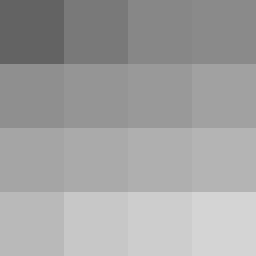

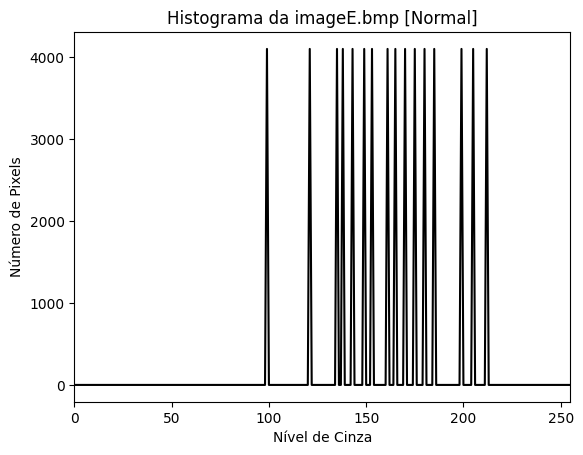

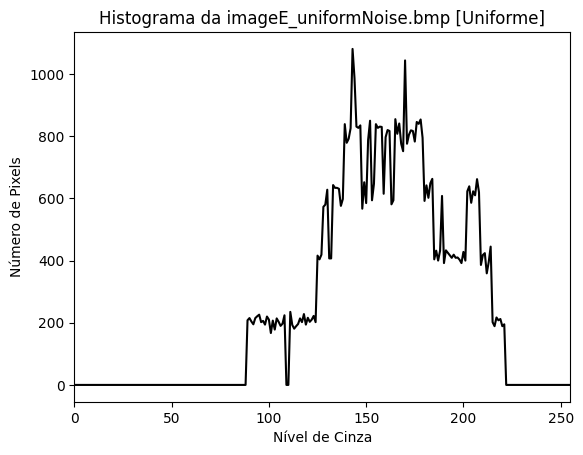

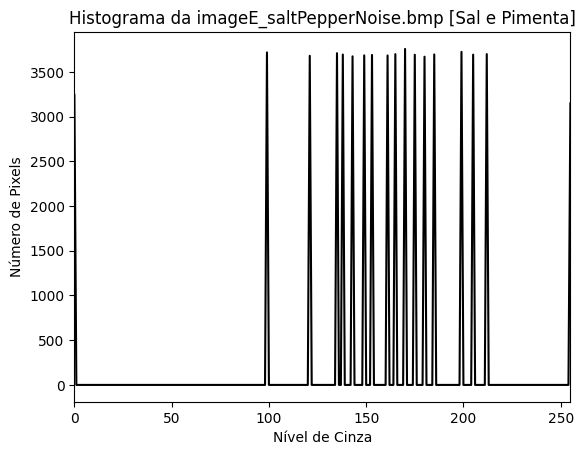

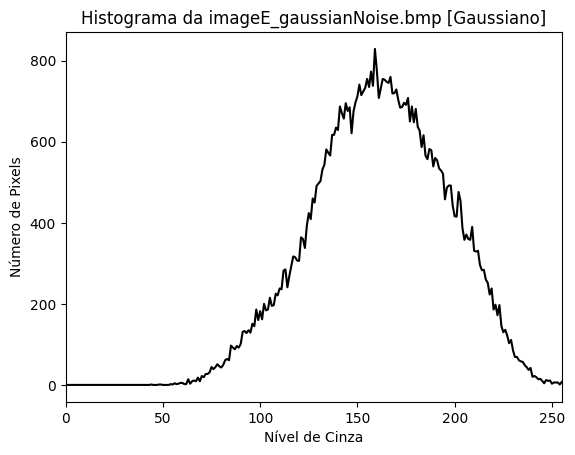

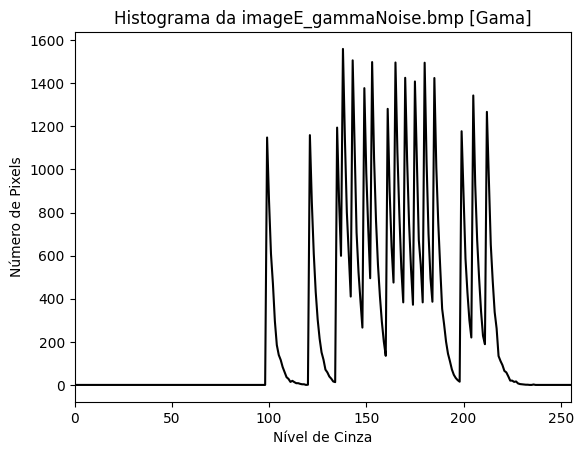

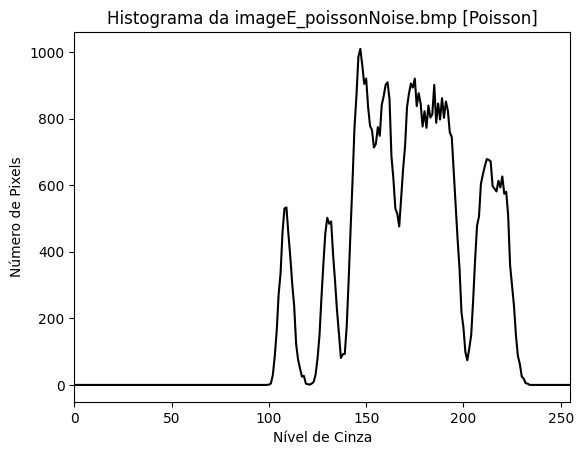

In [3]:
os.makedirs(f'{FILES_DIR}/normal/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/noise/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/histograms/', exist_ok = True)

imageName = 'imageE.bmp'

image = Image.open(f'{FILES_DIR}/normal/{imageName}')
image.show()

showHistogram(imageName)

uniformNoise(imageName)
saltPepperNoise(imageName)
gaussianNoise(imageName)
gammaNoise(imageName)
poissonNoise(imageName)